# **Chi-Square Goodness of Fit**

The Chi-Square Goodness of Fit test is a statistical test used to determine if a sample data matches an expected distribution. It compares the observed frequency of events in each category to the expected frequency under the null hypothesis.

**Why we use it ?**

- We use the Chi-Square Goodness of Fit test to assess how well the observed data fits a specific theoretical distribution.

- This helps us understand whether there is a significant difference between the expected and observed frequencies.

**When we use it ?**

- The data is categorical (nominal or ordinal).

- When we have a set of expected proportions or frequencies.

- When we want to test if the observed data follows a particular distribution or if there are significant deviations.

## Dataset

### Data Generating Code

In [101]:
import numpy as np
import pandas as pd


drinks = ['Coffee', 'Tea', 'Juice', 'Water', 'Soda', 'Milk', 'Lemonade', 'Iced Tea', 'Smoothie', 'Energy Drink']
observed_preferences_bulk = np.random.randint(50, 300, size=len(drinks))  
expected_proportions_bulk = np.array([0.15, 0.10, 0.10, 0.10, 0.10, 0.08, 0.08, 0.07, 0.07, 0.08])  
total_respondents_bulk = 100

expected_preferences_bulk = expected_proportions_bulk * total_respondents_bulk
scaled_expected_preferences_bulk = expected_preferences_bulk * (np.sum(observed_preferences_bulk) / np.sum(expected_preferences_bulk))

data = pd.DataFrame({
    'Drink': drinks,
    'Observed': observed_preferences_bulk,
    'Expected': scaled_expected_preferences_bulk
})


data.to_csv('C:/Github Repository/Advanced-Statistical-Methods-for-AB-and-Hypothesis-Testing-Methods-of-Experimentations/datasets/Chi-Square Goodness of Fit/drink_preferences.csv', index=False)

### Loading Dataset

In [102]:
import pandas as pd

data = pd.read_csv('C:/Github Repository/Advanced-Statistical-Methods-for-AB-and-Hypothesis-Testing-Methods-of-Experimentations/datasets/Chi-Square Goodness of Fit/drink_preferences.csv')

In [103]:
data.head()

,Drink,Observed,Expected
0,Coffee,111,279.032258
1,Tea,171,186.021505
2,Juice,157,186.021505
3,Water,225,186.021505
4,Soda,243,186.021505


### Data Summary

**Total rows:** 10 (representing 10 types of drinks)

**Total columns:** 3 (representing the drink type, observed frequencies, and expected frequencies)

**Drink column:** Contains the drink types.

**Observed column:** Contains randomly generated observed values (based on simulated survey data).

**Expected column:** Contains expected frequencies calculated using predefined proportions.

### Data Visualization

#### (Observed vs Expected)

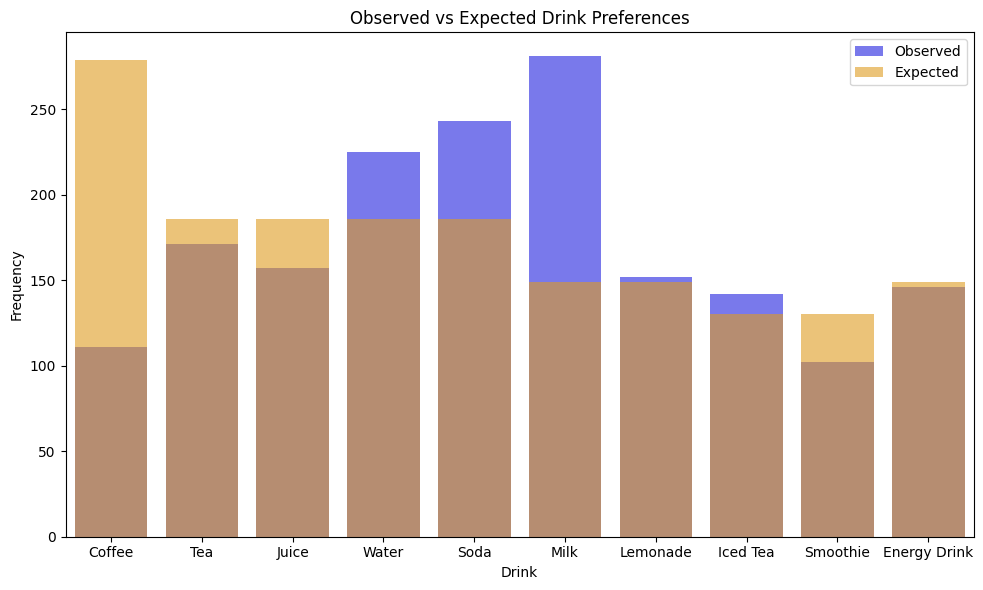

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Drink', y='Observed', data=data, color='blue', label='Observed', alpha=0.6)
sns.barplot(x='Drink', y='Expected', data=data, color='orange', label='Expected', alpha=0.6)
plt.title('Observed vs Expected Drink Preferences')
plt.xlabel('Drink')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

#### (Observed Preferences Distribution)

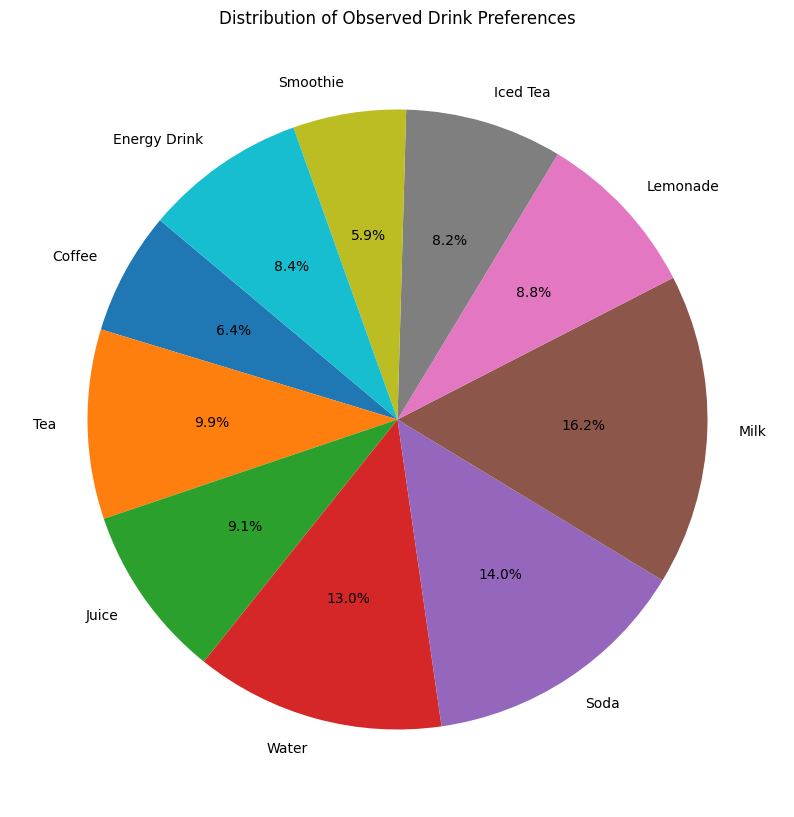

In [105]:
plt.figure(figsize=(10, 12))
plt.pie(data['Observed'], labels=data['Drink'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Observed Drink Preferences')
plt.show()

#### (Expected Preferences Distribution)

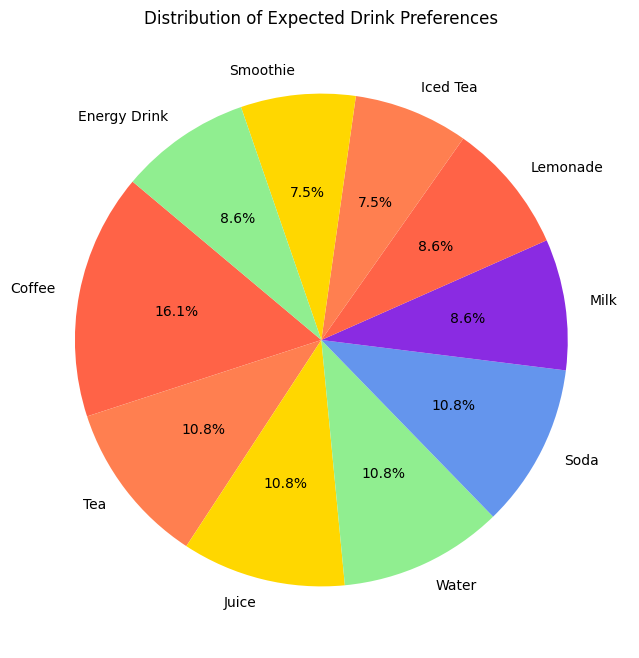

In [106]:
plt.figure(figsize=(8, 8))
plt.pie(data['Expected'], labels=data['Drink'], autopct='%1.1f%%', startangle=140, colors=['#FF6347','#FF7F50','#FFD700','#90EE90','#6495ED','#8A2BE2'])
plt.title('Distribution of Expected Drink Preferences')
plt.show()

#### (Distribution of Observed vs Expected)

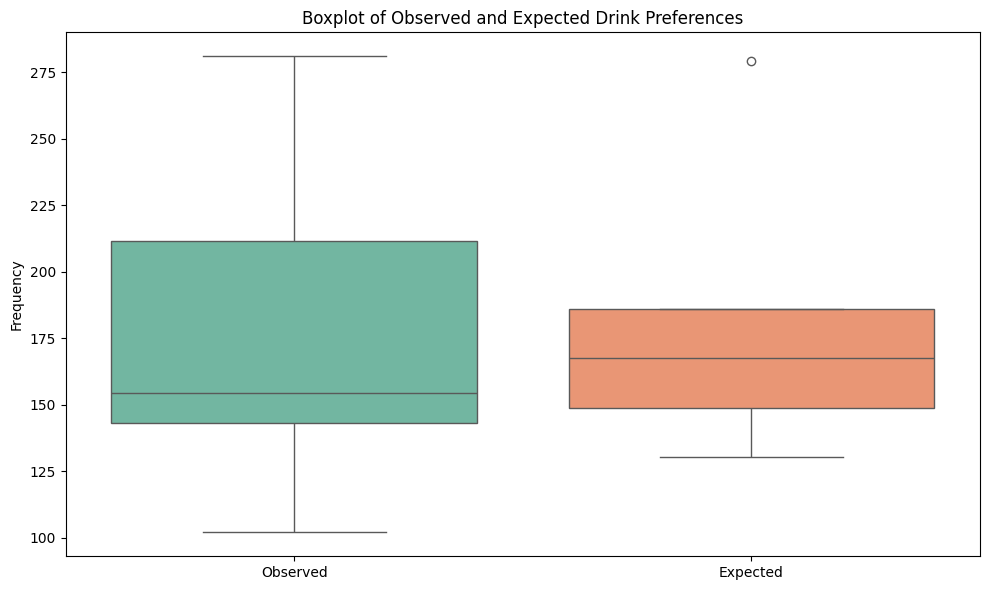

In [107]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=[data['Observed'], data['Expected']], palette="Set2")
plt.xticks([0, 1], ['Observed', 'Expected'])
plt.title('Boxplot of Observed and Expected Drink Preferences')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Chi-Square Goodness of Fit

In [108]:
from scipy import stats

chi2_stat, p_val = stats.chisquare(data['Observed'], data['Expected'])
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")


if p_val < 0.05:
    print("Reject the null hypothesis: Significant difference between observed and expected frequencies.")
else:
    print("Fail to reject the null hypothesis: No significant difference between observed and expected frequencies.")

Chi-Square Statistic: 257.25851981833193
P-Value: 2.923832815953034e-50
Reject the null hypothesis: Significant difference between observed and expected frequencies.


-  **Since the p-value is much smaller than the significance level (alpha = 0.05), we reject the null hypothesis.**

-  **This means that there is a significant difference between the observed and expected frequencies. The observed data does not fit the expected distribution, indicating that the preferences for the drinks are not in line with the expected proportions.**